# Processing The Produced Data
### Begin by importing the required libraries for data processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Useful Functions
Create function to load error data (during training) from ../../output/. Once data has been loaded, we would like to visualize this data in a graphical form, so we will create a function for exactly this purpose.

In [6]:
# loads a training set into a dataframe
def loadTrainingErrorSet(name):
    df = pd.read_csv("../../output/" + name + ".csv", header=None).transpose()
    col_names = {}
    for i in range(len(df.columns)):
        col_names[i] = "Trial " + str(i)
    df.rename(columns=col_names, inplace=True)
    df['means'] = df.mean(axis=1)
    df['devs'] = df.std(axis=1)
    return df
    
# plots every trial from this dataframe
def plotAccSet(df, title, saveName=None):
    saveName = None
    fig,ax = plt.subplots(1)
    for col in df.columns:
        if col != "means" and col != 'devs':
            plt.plot(df[col])
    plt.xlabel("Iterations")
    plt.ylabel("Mean Square Eror")
    plt.title(title)
    ax.set_xticklabels([])
    ax.set_xticks([])
    if saveName is not None:
        plt.savefig("../../output/Pics/" + saveName + ".jpg")
    plt.show()




## Load all Accuracy data into dataframes

In [7]:
# 3 class trivial data
triv3NN100 = loadTrainingErrorSet("100/3TrivialNNTraining_100")
triv3swarm100 = loadTrainingErrorSet("100/3TrivialSwarmTraining_100")
triv3qSwarm100 = loadTrainingErrorSet("100/3TrivialQ_SwarmTraining_100")

# pinwheel data
pinNN100 = loadTrainingErrorSet("100/PinwheelNNTraining_100")
pinswarm100 = loadTrainingErrorSet("100/PinwheelSwarmTraining_100")
pinqSwarm100 = loadTrainingErrorSet("100/PinwheelQ_SwarmTraining_100")


### Visualize these frames


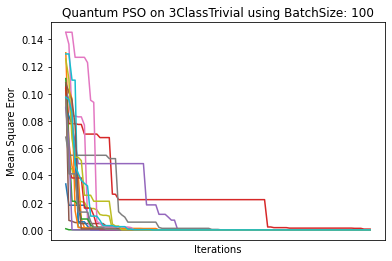

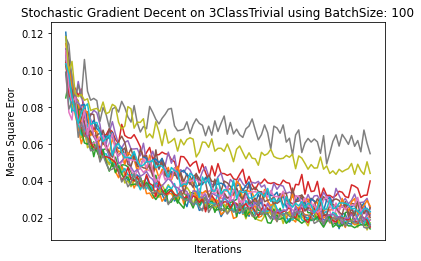

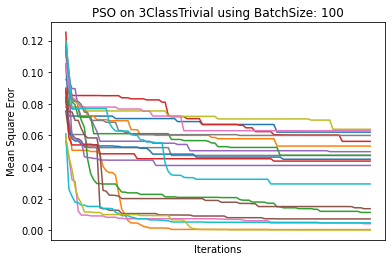

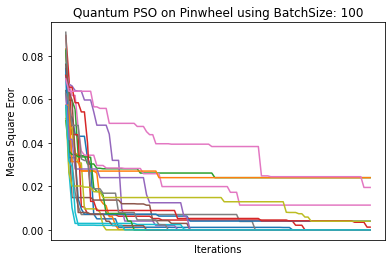

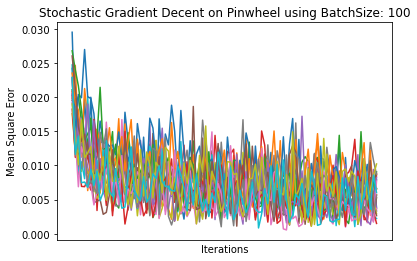

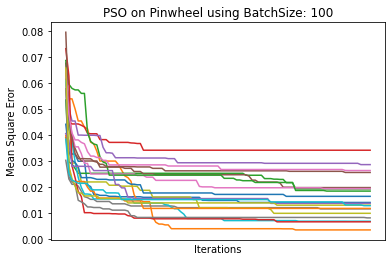

In [8]:
# 3 class trivial visualize 100
plotAccSet(triv3qSwarm100, "Quantum PSO on 3ClassTrivial using BatchSize: 100", saveName="3trivqSwarm100")
plotAccSet(triv3NN100, "Stochastic Gradient Decent on 3ClassTrivial using BatchSize: 100", saveName="3trivNN100")
plotAccSet(triv3swarm100, "PSO on 3ClassTrivial using BatchSize: 100", saveName="3trivswarm100")

# pinwheel visualize
plotAccSet(pinqSwarm100, "Quantum PSO on Pinwheel using BatchSize: 100", saveName="pinqSwarm100")
plotAccSet(pinNN100, "Stochastic Gradient Decent on Pinwheel using BatchSize: 100", saveName="pinNN100")
plotAccSet(pinswarm100, "PSO on Pinwheel using BatchSize: 100", saveName="pinswarm100")


### Visualize an **averaged** version of these plots
These plots show every single trial, which can be hard to visualize exactly whats going on, lets try to create a averaged version of each plot, for a more direct comparison


In [9]:
def plotAccSetAveraged(df, title, saveName=None):
    saveName = None
    fig,ax = plt.subplots(1)
    plt.plot(df['means'])
    upper = df['means'] + df['devs']
    lower = df['means'] - df['devs']
    plt.plot(upper, alpha=0.3)
    plt.plot(lower, alpha=0.3)
    plt.fill_between(list(range(len(df['means']))), lower, upper, color='blue', alpha=0.3, label='std deviation') 
    plt.xlabel("Iterations")
    plt.ylabel("Mean Square Eror")
    plt.title(title)
    plt.legend()
    ax.set_xticklabels([])
    ax.set_xticks([])
    if saveName is not None:
        plt.savefig("../../output/Pics/" + saveName + ".jpg")
    plt.show()



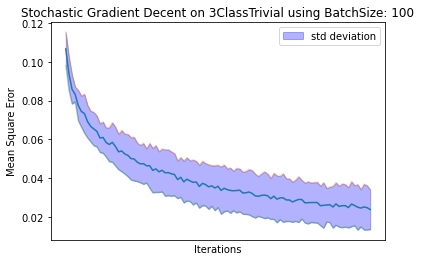

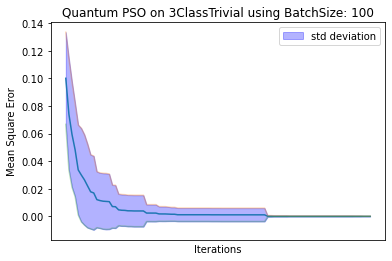

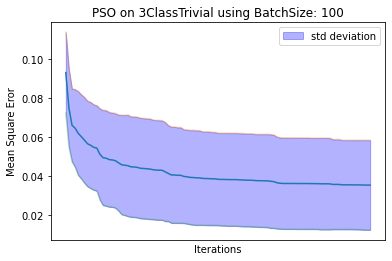

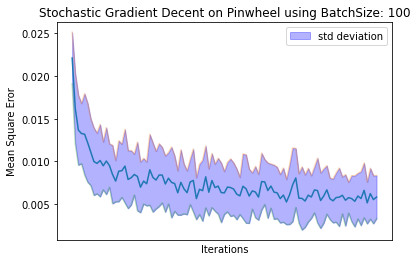

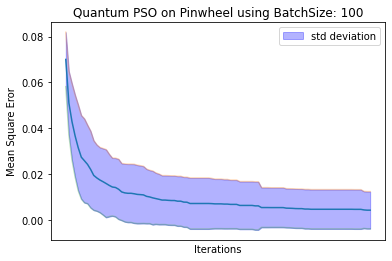

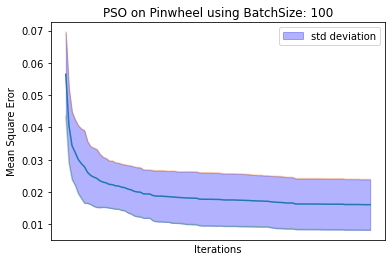

In [10]:
# 3 class trivial visualize 100
plotAccSetAveraged(triv3NN100, "Stochastic Gradient Decent on 3ClassTrivial using BatchSize: 100", saveName="3TrivmeanNN100")
plotAccSetAveraged(triv3qSwarm100, "Quantum PSO on 3ClassTrivial using BatchSize: 100", saveName="3TrivmeanQSWARM100")
plotAccSetAveraged(triv3swarm100, "PSO on 3ClassTrivial using BatchSize: 100", saveName="3TrivmeanSWARM100")

# pinwheel visualize 100
plotAccSetAveraged(pinNN100, "Stochastic Gradient Decent on Pinwheel using BatchSize: 100", saveName="PinmeanNN100")
plotAccSetAveraged(pinqSwarm100, "Quantum PSO on Pinwheel using BatchSize: 100", saveName="PinmeanQSWARM100")
plotAccSetAveraged(pinswarm100, "PSO on Pinwheel using BatchSize: 100", saveName="PinmeanSWARM100")

### Side by Side
It might be easier for direct comparison purposes to have side-by-side subplots, lets do that

In [ ]:
def sideBySideErrorSet(df, title, saveName):
    fig, axs = plt.subplots(1, 2)

    for col in df.columns:
        if col != "means" and col != 'devs':
            axs[0].plot(df[col])

    axs[0].set_ylabel("Mean Square Eror")
    axs[0].set_xlabel("Iterations")
    axs[1].set_xlabel("Iterations")
    axs[1].plot(df['means'])
    upper = df['means'] + df['devs']
    lower = df['means'] - df['devs']
    axs[1].plot(upper, alpha=0.3)
    axs[1].plot(lower, alpha=0.3)
    axs[1].fill_between(list(range(len(df['means']))), lower, upper, color='blue', alpha=0.3, label='std deviation') 
    axs[1].legend()
    fig.suptitle(title)

    axs[1].set_yticklabels([])
    axs[1].set_xticklabels([])
    axs[1].set_xticks([])
    axs[0].set_xticklabels([])
    axs[0].set_xticks([])

    if saveName is not None:
        fig.savefig("../../output/Pics/" + saveName + ".jpg")
    
    fig.show()

In [ ]:
if (False):
    # 3 class trivial 100
    sideBySideErrorSet(triv3NN100, "Stochastic Gradient Decent on 3ClassTrivial using BatchSize: 100", saveName="Triv3sideNN100")
    sideBySideErrorSet(triv3qSwarm100, "Quantum PSO on 3ClassTrivial using BatchSize: 100", saveName="Triv3sideQSWARM100")
    sideBySideErrorSet(triv3swarm100, "PSO on 3ClassTrivial using BatchSize: 100", saveName="Triv3sideSWARM100")

    # pinwheel 100
    sideBySideErrorSet(pinNN100, "Stochastic Gradient Decent on Pinwheel using BatchSize: 100", saveName="PinsideNN100")
    sideBySideErrorSet(pinqSwarm100, "Quantum PSO on Pinwheel using BatchSize: 100", saveName="PinsideQSWARM100")
    sideBySideErrorSet(pinswarm100, "PSO on Pinwheel using BatchSize: 100", saveName="PinsideSWARM100")


## Performance across batch sizes
It would be interesting to see how each algorithm performs across batch sizes. For the following function, we would like to plot the performance (average) with variance bands, of a specific algorithm, on a specific problem, for all batch sizes.


In [60]:
## algo options are NN, Q_Swarm, Swarm
## prob options are 3Trivial, Pinwheel, Swirl
## form is <prob><algo>Train_<batchsize>.csv
def plot_algo_across_batch(algo_str, prob_str, saveName):
    fig,ax = plt.subplots(1)
    batchOptions = ["10", "50", "100", "200", "500"]
    dfs = []
    for batch in batchOptions:
        dfs.append(loadTrainingErrorSet(batch + "/" + prob_str + algo_str + "Training_" + batch))

    colors = ['firebrick', 'khaki', 'deepskyblue', 'darkorchid', 'mediumseagreen']

    for i in range(len(dfs)):
        xs = np.array(list(range(len(dfs[i]['means'])))) * 100
        plt.plot(xs, dfs[i]['means'], color=colors[i])
        upper = dfs[i]['means'] + dfs[i]['devs']
        lower = dfs[i]['means'] - dfs[i]['devs']
        plt.plot(xs, upper, alpha=0.3, color=colors[i])
        plt.plot(xs, lower, alpha=0.3, color=colors[i])
        plt.fill_between(xs, lower, upper, alpha=0.2, label="BatchSize: " + batchOptions[i], color=colors[i]) 

    plt.xlabel("Iterations")
    plt.ylabel("Mean Square Erorr")

    nice_algo_str = None
    if algo_str == "NN":
        nice_algo_str = " Gradient Decent "
    elif algo_str == "Q_Swarm":
        nice_algo_str = " Quantum PSO "
    elif algo_str == "Swarm":
        nice_algo_str = " PSO "

    algo_title = "3 Class Trivial" if prob_str == "3Trivial" else str(prob_str)
    plt.title("Performance of" + nice_algo_str + "Across BatchSizes on " + algo_title)
    plt.legend()
    
    if saveName is not None:
        fig.savefig("../../output/Pics/BatchComparison/" + saveName + ".jpg")

    

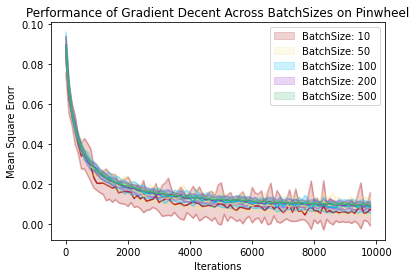

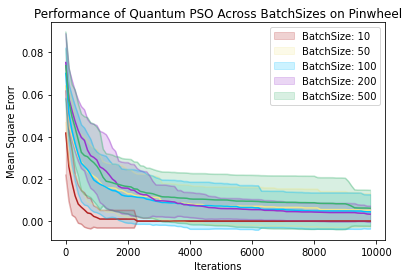

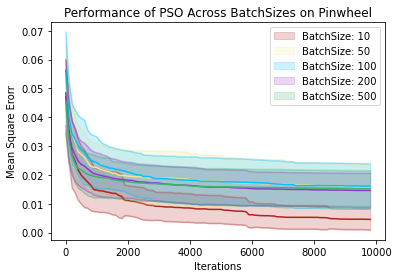

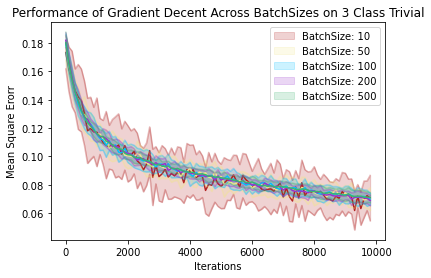

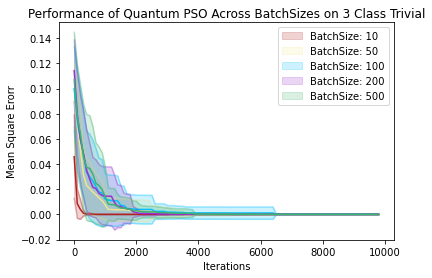

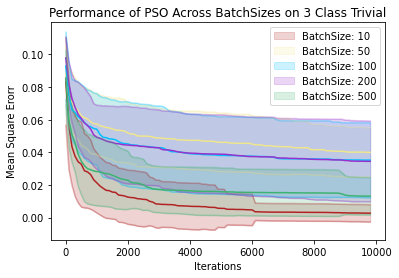

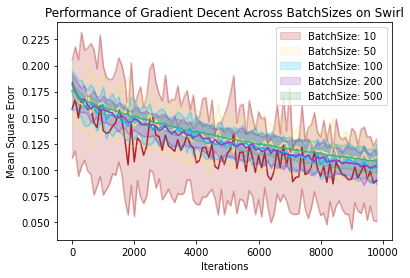

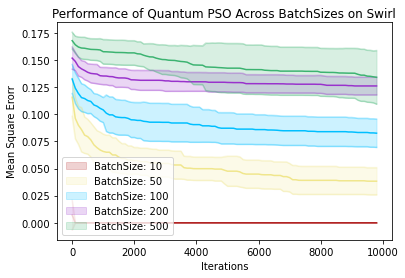

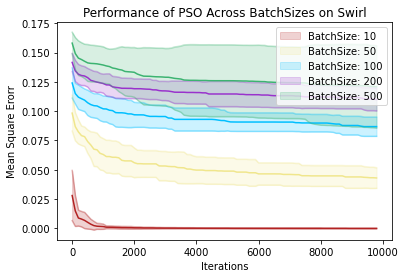

In [61]:
## Swirl Batch Data
plot_algo_across_batch("NN", "Pinwheel", "SG_PinWheel_Batch")
plot_algo_across_batch("Q_Swarm", "Pinwheel", "QPSO_PinWheel_Batch")
plot_algo_across_batch("Swarm", "Pinwheel", "PSO_PinWheel_Batch")

## 3ClassTrivial Batch Data
plot_algo_across_batch("NN", "3Trivial", "SG_3Trivial_Batch")
plot_algo_across_batch("Q_Swarm", "3Trivial", "QPSO_3Trivial_Batch")
plot_algo_across_batch("Swarm", "3Trivial", "PSO_3Trivial_Batch")

## Swirl Batch Data
plot_algo_across_batch("NN", "Swirl", "SG_Swirl_Batch")
plot_algo_across_batch("Q_Swarm", "Swirl", "QPSO_Swirl_Batch")
plot_algo_across_batch("Swarm", "Swirl", "PSO_Swirl_Batch")